# Introduction to `R`

`R`is a language for statistical computing and data science. And currently, it is one of the most popular software to do statistical analyses.

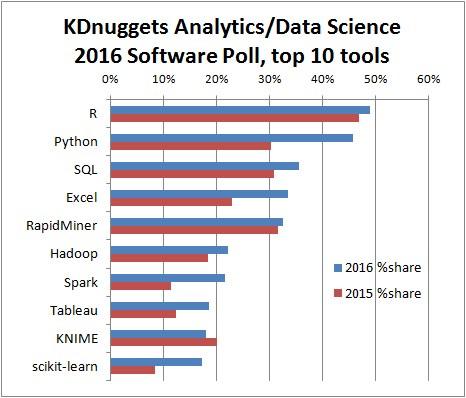

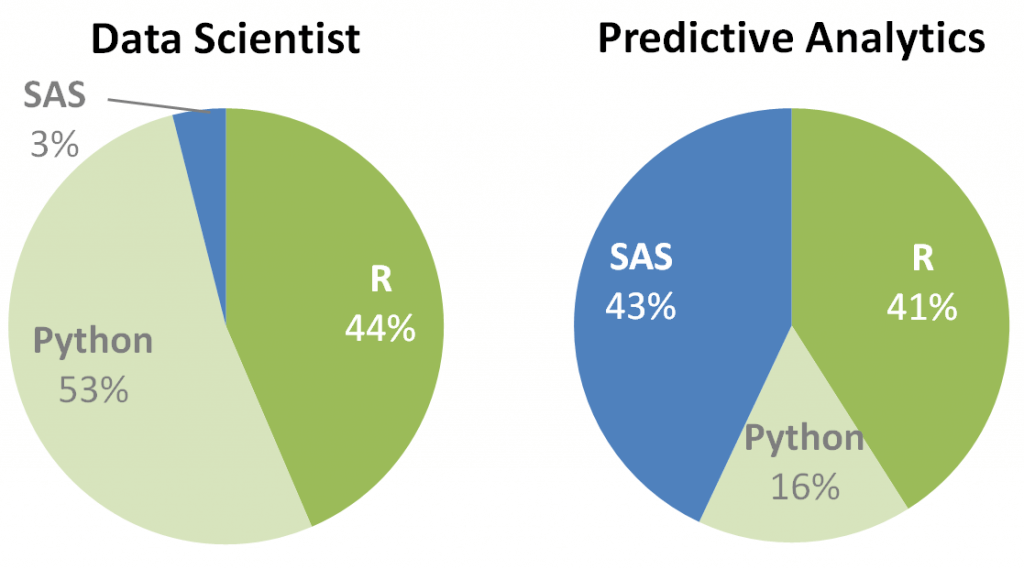

 ## Why to use `R`?
 
1. It is free and open-source
2. R has a large number of packages thanks to a huge community of collaborators
3. It is a real programing language
4. You do everything in scripts, and because of that, you don't have to remember what you did long after you finish your project (no clicking).

## Components of `R`

- the console
- variables
- plots

# Learning R

To learn `R`, you have to dedicate some time to it. Watching video tutorials and following them step by step is a good way to start ([link](https://www.youtube.com/watch?v=lL0s1coNtRk)). But, the best way is with practical guides, in which you read and follow the instructions. I personally recommend the following book: 

[Beckerman AP, Childs DZ, Petchey OL. Getting started with R: an introduction for biologists. Oxford University Press; 2017 Feb 23.](https://www.amazon.com/Getting-Started-R-Introduction-Biologists/dp/0198787847)

In [1]:
# variables
height <- 4

In [2]:
height

[1] 4

In [3]:
height = 5

In [4]:
height

[1] 5

In [5]:
width <- 3
#calculate the are of a rectangle
area = height * width
area

[1] 15

In [6]:
# variables can also strore many entries

numbers = 1:100
numbers

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

In [7]:
# letters are store as characters,
letters = c("a", "b", "c")
letters

[1] "a" "b" "c"

In [8]:
# you can also use your variable as factors, where values are id by levels

animals = c('mammals', 'birds', "reptiles", 'amphibians', 'humans')
animals = factor(animals)
levels(animals)

[1] "amphibians" "birds"      "humans"     "mammals"    "reptiles"

In [9]:
levels(animals)[3] <- "mammals" 

levels(animals)
animals

[1] "amphibians" "birds"      "mammals"    "reptiles"

[1] mammals    birds      reptiles   amphibians mammals   
Levels: amphibians birds mammals reptiles

## Step 1: Install `R` and the necessary packages


In [10]:
# install.packages(c("coda","mvtnorm","devtools","loo","dagitty", 'rstan', "brms", "readxl"))
# library(devtools)
# devtools::install_github("rmcelreath/rethinking")

In [10]:
# load the packages
library(rethinking)
library(brms)
library('readxl')

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent


Loading required package: Rcpp

Loading 'brms' package (version 2.14.4). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following objects are masked from ‘package:rethinking’:

    LOO, stancode, WAIC


The following object is masked from ‘package:rstan’:

    loo


The following object is masked from ‘package:stat

# Introduction to Bayesian statistics

In this Jupyter Notebook, I will introduce you to two practical, easy, and powerful `R` packages to do **Bayesian Statistical Inference**:

- rethinking, from [Richard McElreath ‘s lectures](https://github.com/rmcelreath/statrethinking_winter2019) and [amazing book](https://www.amazon.de/Statistical-Rethinking-Bayesian-Examples-Chapman/dp/036713991X/ref=sr_1_1?__mk_de_DE=%C3%85M%C3%85%C5%BD%C3%95%C3%91&crid=2U80GHSYN6SXD&dchild=1&keywords=statistical+rethinking&qid=1593046024&sprefix=statistical+re%2Caps%2C337&sr=8-1).

- brms, from [Paul Buerkner's amazing package and his tutorials](https://github.com/paul-buerkner/brms)

Today, these two packages offer some of the most popular `R` to `Stan` interfaces. If you want to learn more, there is a lot of material on the topic. For example, you can find all the example's from the Statistical Rethinking book also available in the `brms` package, all thanks to [Solomon Kurz](https://bookdown.org/ajkurz/Statistical_Rethinking_recoded/).

But for practical purposes and for the sake of time, we will work with some real-life examples and develop some intuition about how statistical models work and why doing it in stan is -in my personal opinion- more efficient, powerful, and flexible.


## A general language to understand statistics

In traditional statistics, we are normally facing many statistical tests, assumptions, violations of assumptions, and if the model is very complex several warning or error messages.

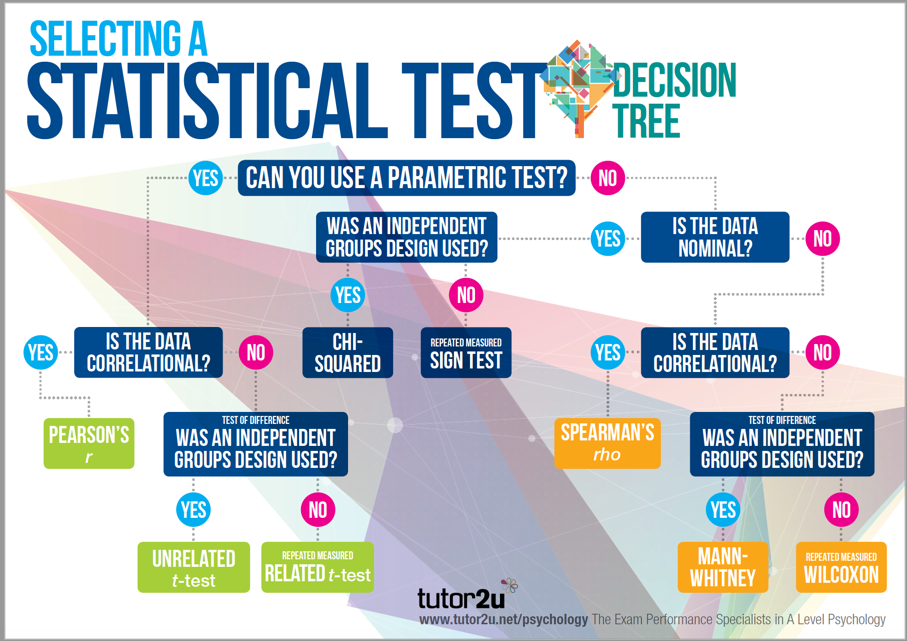

Here, we will use another approach and summarized those threes into a more general framework:

Steps for building a statistical model:

1. Identify your outcome (dependent) variables (`Y`)
2. Define the likelihood distribution based on the type of data in the outcome variable (e.g., normal, binomial, etc.) 
3. Identify your predictors (i.e., your explanatory variables, `x`)
4. relate your predictors to the response variable
5. choose your priors (assumptions)




Two ways to write the model:

### Common in literature
$y_{i} \approx  \alpha + \beta x_{i} + \epsilon_{i}$

$\epsilon_{i} \approx Normal(0,\sigma)$


### Less common but used in Stan lenguage
    

<center> $y_{i} \approx Normal(\mu_{i}, \sigma)$ `# likelihood`<center>

<center> $\mu_{i} = \alpha + \beta_{x} x_{i}$ `# linear model`<center>

<center>$\alpha \approx Normal(0, 10)$, `# prior for intercept`<center>

<center>$\beta_{x} \approx Normal(0, 10)$, `# pior for slope`<center>

<center>$\sigma \approx exponential(1)$, `# prior for error term`<center>



## Step 2: Load your data. 

This Notebook will show you how to run some models reusing some published data from my Ph.D. in [Anaya-Rojas et., 2016](https://onlinelibrary.wiley.com/doi/epdf/10.1111/jeb.12934). 

**The association of feeding behavior with the resistance and tolerance to parasites in recently diverged sticklebacks**


Jaime M. Anaya‐Rojas  Franziska S. Brunner  Nina Sommer  Ole Seehausen  Christophe Eizaguirre  Blake Matthews
First published: 05 July 2016 https://doi.org/10.1111/jeb.12934Citations: 9
Dryad data is available online: doi:10.5061/dryad.b0846
 
 
 
<center>Abstract <center>
    
    
Divergent natural selection regimes can contribute to adaptive population divergence, but can be sensitive to human‐mediated environmental change. Nutrient loading of aquatic ecosystems, for example, might modify selection pressures by altering the abundance and distribution of resources and the prevalence and infectivity of parasites. Here, we used a mesocosm experiment to test for interactive effects of nutrient loading and parasitism on host condition and feeding ecology. Specifically, we investigated whether the common fish parasite *Gyrodactylus sp*. differentially affected recently diverged lake and stream ecotypes of three‐spined stickleback (*Gasterosteus aculeatus*). We found that the stream ecotype had a higher resistance to *Gyrodactylus sp.* infections than the lake ecotype, and that both ecotypes experienced a cost of parasitism, indicated by negative relationships between parasite load and both stomach fullness and body condition. Overall, our results suggest that in the early stages of adaptive population divergence of hosts, parasites can affect host resistance, body condition and diet.
   
  **Notes on the experimental design**:
    
    
 Our experimental set‐up consisted of 40 outdoor mesocosms. It was a complete **randomized block design**, with **factorial combinations** of fish ecotype (lake and stream), nutrient level (high and low nutrients, HN and LN), and *Gyrodactylus* exposure (exposed and unexposed, G+ and G−, Fig. 1).
    
    

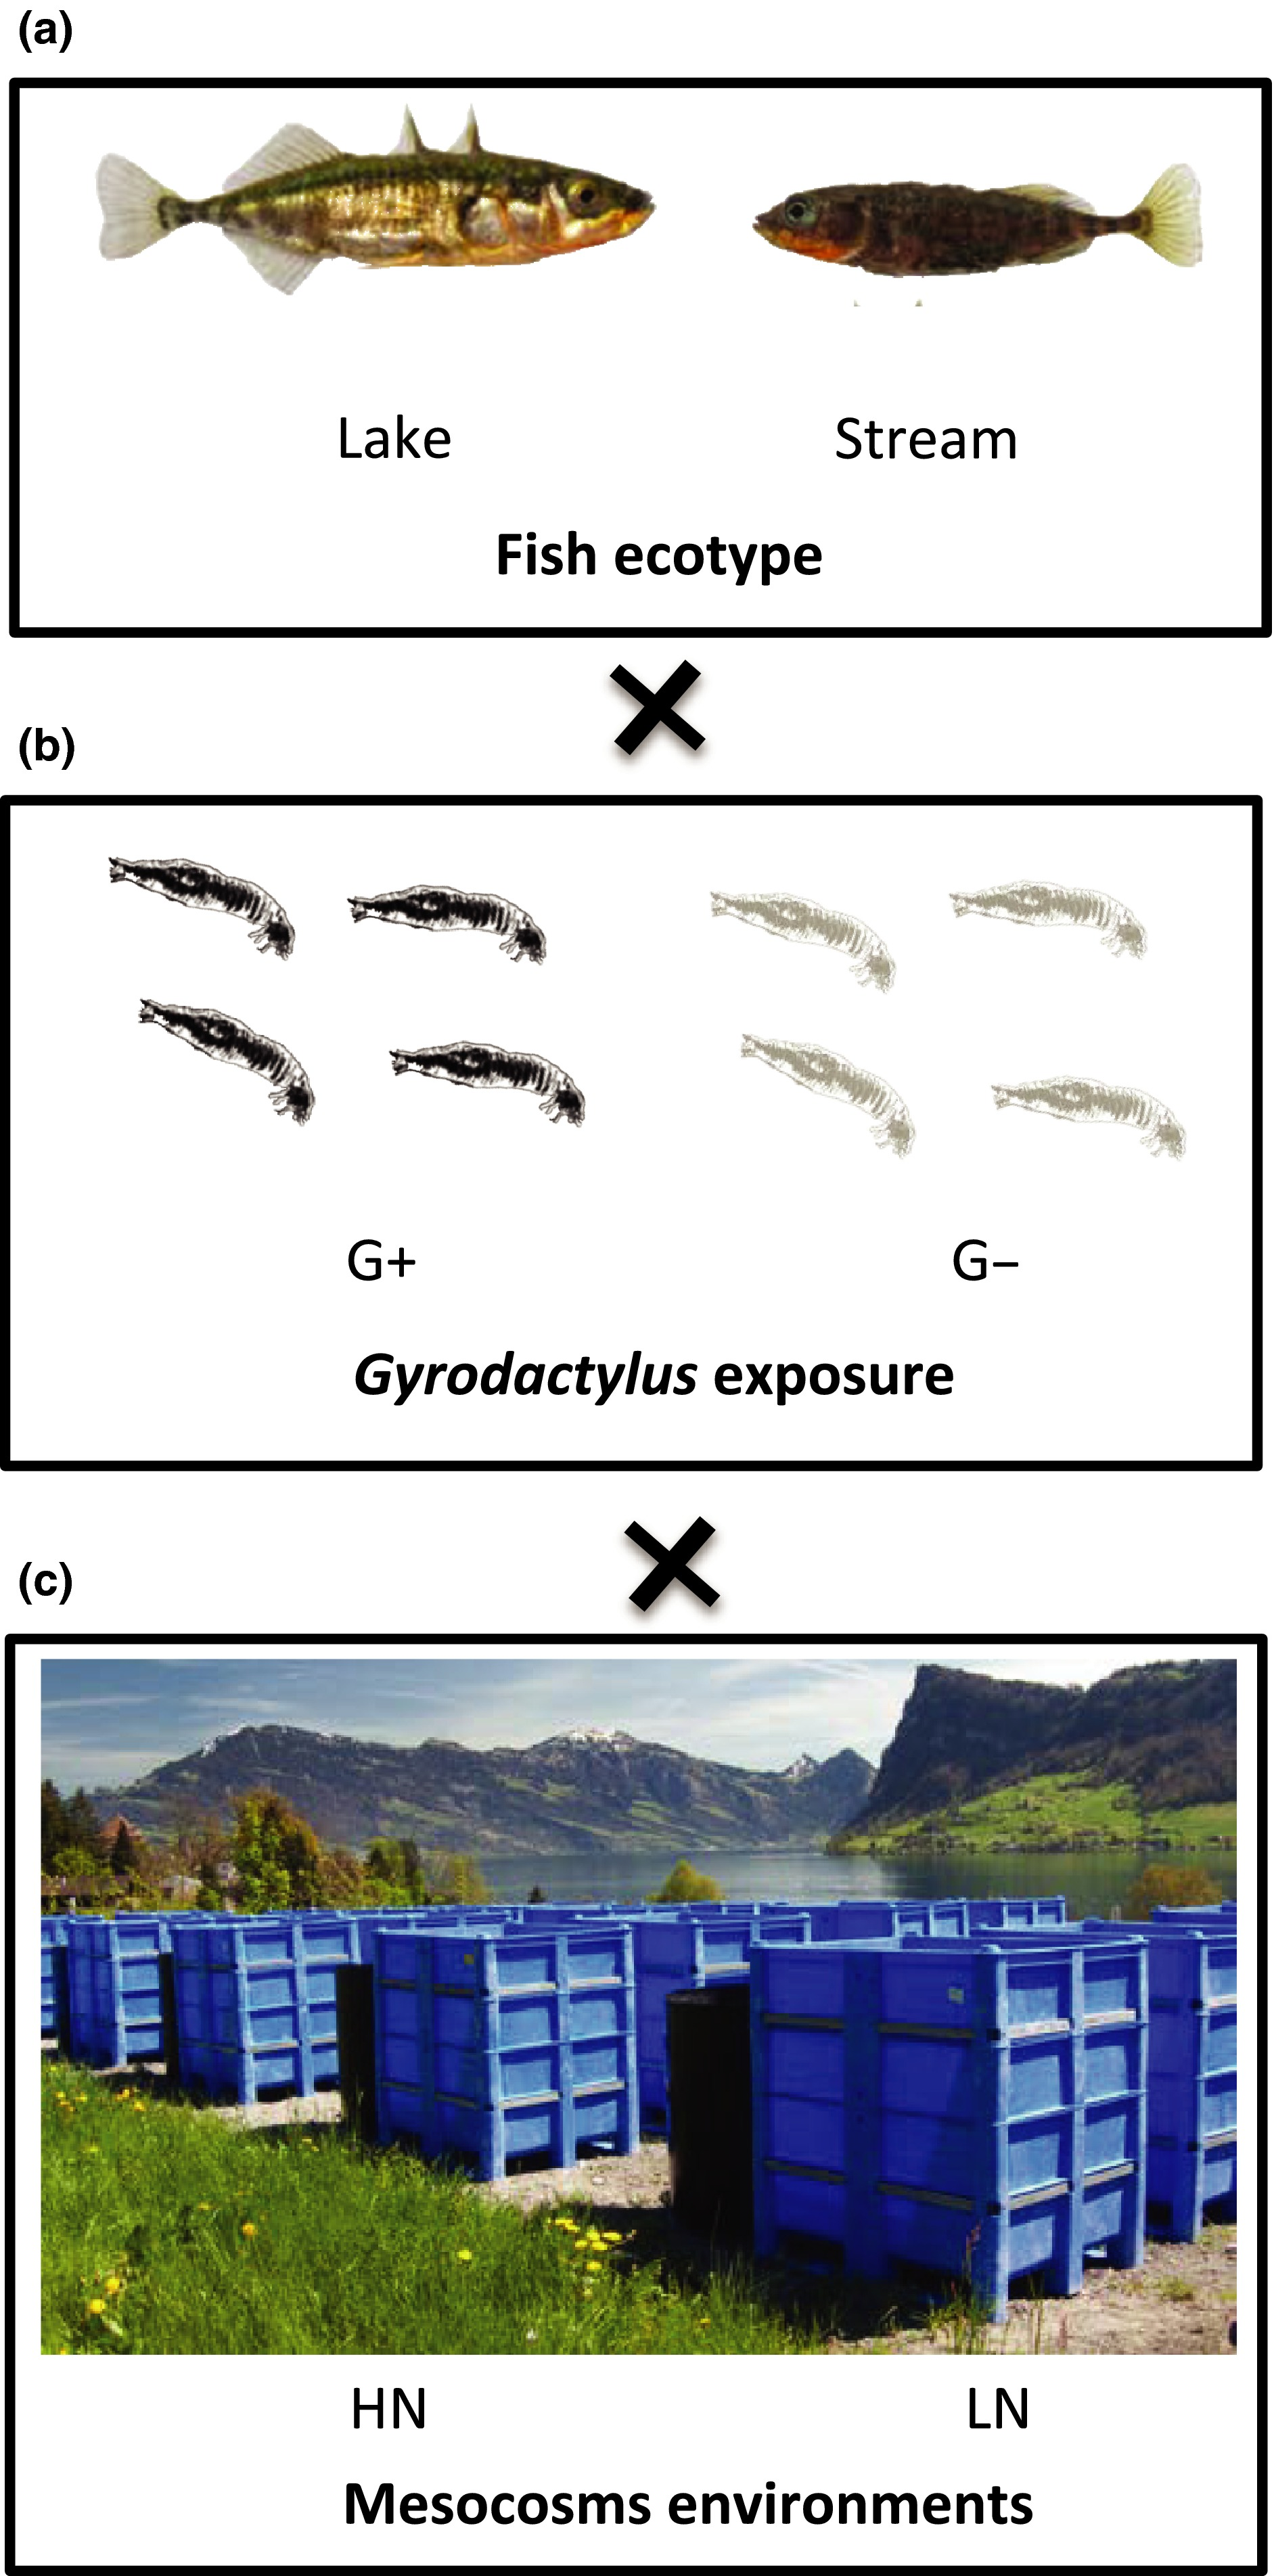

## Getting the data

In [13]:
data = read_xls("Examples/Anaya-Rojas et al 2016/Fish_and_TankData.xls")
data[1:25,1:10]

Sample_ID FishNo Origin Tank Sex Block Exposure Nutrients Gyrocount
1  M1_3      3      Lake   1    F   1     G+       high       4       
2  M1_2      2      Lake   1    F   1     G+       high       1       
3  M1_4      4      Lake   1    F   1     G+       high       0       
4  M2_2      2      Lake   2    F   1     G-       low        3       
5  M2_4      4      Lake   2    F   1     G-       low       13       
6  M2_7      7      Lake   2    F   1     G-       low        0       
7  M2_3      3      Lake   2    F   1     G-       low        9       
8  M2_5      5      Lake   2    F   1     G-       low        2       
9  M2_6      6      Lake   2    F   1     G-       low        3       
10 M3_3      3      Stream 3    F   1     G-       low        1       
11 M3_6      6      Stream 3    F   1     G-       low        8       
12 M3_2      2      Stream 3    F   1     G-       low        1       
13 M3_4      4      Stream 3    F   1     G-       low       18       
14 M3_5      5      Stream 3    F   1     G-       low        3       
15 M4_2      2      Stream 4    F   1     G+       high       0       
16 M5_2      2      Lake   5    F   4     G-       high       0       
17 M5_4      4      Lake   5    F   4     G-       high       0       
18 M5_3      3      Lake   5    F   4     G-       high       0       
19 M5_5      5      Lake   5    F   4     G-       high       5       
20 M6_3      3      Stream 6    F   1     G+       low        0       
21 M6_4      4      Stream 6    F   1     G+       low        0       
22 M6_5      5      Stream 6    F   1     G+       low        0       
23 M7_5      5      Lake   7    F   1     G+       low        5       
24 M7_6      6      Lake   7    F   1     G+       low        7       
25 M8_4      4      Lake   8    F   1     G-       high       0       
   Sd.lenght.mm
1  5.3         
2  5.7         
3  5.9         
4  6.2         
5  6.5         
6  5.9         
7  5.2         
8  5.8         
9  6.1         
10 4.6         
11 5.4         
12 4.0         
13 5.0         
14 4.6         
15 4.5         
16 6.4         
17 6.0         
18 5.7         
19 5.8         
20 4.3         
21 5.1         
22 4.3         
23 6.0         
24 4.6         
25 5.6

## Get to know your data

It is important to know what type of data you have and what type of data you need for the program to work.

In [14]:
data$Origin = factor(data$Origin)
levels(data$Origin)

data$Nutrients = factor(data$Nutrients)
levels(data$Nutrients)

data$Exposure = factor(data$Exposure)
levels(data$Exposure)

[1] "Lake"   "Stream"

[1] "high" "low"

[1] "G-" "G+"

## Building some intuition for statistical inferences

Statistical analysis is a way to relate data. To do that, it estimates parameters that underline some mechanistic explanation of a phenomenon.

Therefore, we will start by evaluating whether parasite infections reduce body condition on stickleback, and how that depends on the host ecotype (lake vs. stream), the nutrient manipulation (high vs. low), and the parasite manipulation (Exposure: G+ vs. G-).

In [17]:
# create dummy variables
data$Lake = ifelse(data$Origin == "Lake", 1, 0)
data$High = ifelse(data$Nutrients == "high", 1, 0)
data$G = ifelse(data$Exposure == 'G+', 1, 0)
data$CI = log(data$HIS) # body condition
data$Gyro = log(data$Gyrocount+1)
data$Tank = factor(data$Tank) # random effects
levels(data$Tank) = 1:length(levels(data$Tank))
data$Block = factor(data$Block)  # random effects
levels(data$Block) = 1:length(levels(data$Block))


### Do parasite affect body condition?


[1] 0.9379905

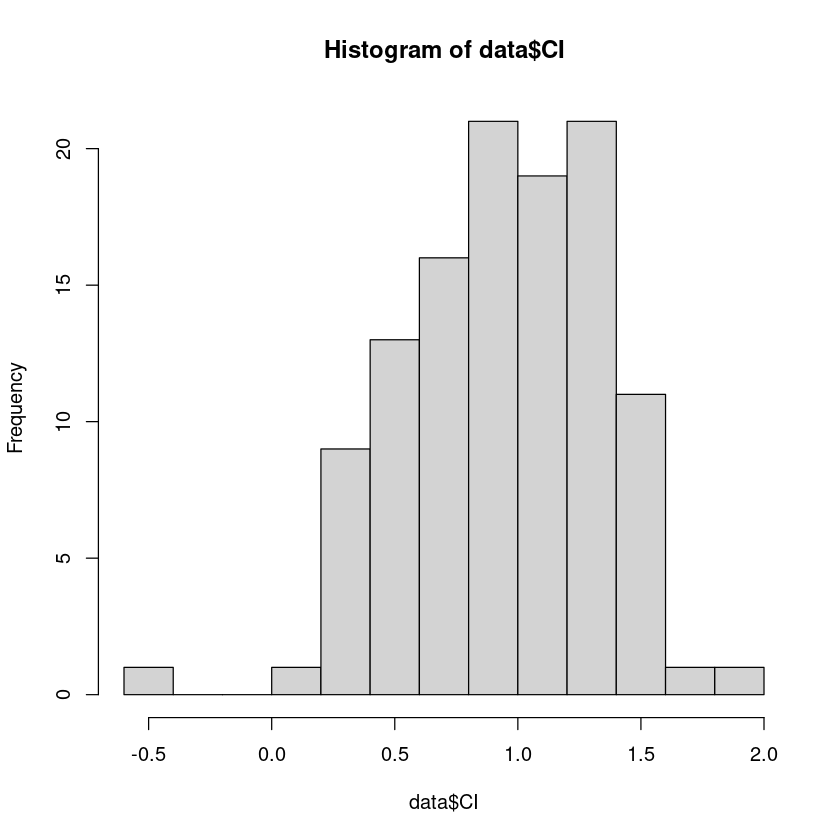

In [18]:
hist(data$CI, breaks = 10)
mean(data$CI)


## Understanding the model
    
<center> $CI_{i} \approx Normal(\mu_{i}, \sigma)$ `# likelihood`<center>

<center> $\mu_{i} = alpha + \beta_{Gyro} Gyro_{i}$ `# linear model`<center>

<center>$\alpha \approx Normal(0, 10)$, `# prior for intercept`<center>

<center>$ \beta_{Gyro}  \approx Normal(0, 10)$, `# pior for slope`<center>

<center>$\sigma \approx exponential(1)$, `# prior for error term`<center>

    
   
    
    

**Intercept**: body condition (log) when Gyro == 0 == log(Gyrocount + 1)
 
**$\beta_{Gyro}$**: increase in body condition (log) for each unit increase in Gyro (log(Gyrocount))

In [20]:
# Keep only the data needed for the anlysis
m.data = data[,c("CI", 'Lake','High','G','Tank','Block','Gyro')]
m.data$Tank = factor(m.data$Tank)
levels(m.data$Tank) = 1:length(levels(m.data$Tank)) # make sure that the levels are correct
m.data$Block = factor(m.data$Block)
levels(m.data$Block) = 1:length(levels(m.data$Block))  # make sure that the levels are correct


In [21]:
str(m.data) # see the structure of the m.data

tibble [114 × 7] (S3: tbl_df/tbl/data.frame)
 $ CI   : num [1:114] 1.46 0.95 1.448 0.841 0.769 ...
 $ Lake : num [1:114] 1 1 1 1 1 1 1 1 1 0 ...
 $ High : num [1:114] 1 1 1 0 0 0 0 0 0 0 ...
 $ G    : num [1:114] 1 1 1 0 0 0 0 0 0 0 ...
 $ Tank : Factor w/ 37 levels "1","2","3","4",..: 1 1 1 2 2 2 2 2 2 3 ...
 $ Block: Factor w/ 5 levels "1","2","3","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Gyro : num [1:114] 1.609 0.693 0 1.386 2.639 ...


In [22]:
# Run a model describing the relationship between body condition (CI) and parasite load (Gyro)
m.1 <- ulam(

    alist(
    CI ~ dnorm(mu, sigma),            # likelihood
    mu <- alpha + beta_G * Gyro,      # linear model
    alpha ~ dnorm(0.93,2),              # prior intercept
    beta_G ~ dnorm(0,10),             # prior slope 
    sigma ~ exponential(1)            # prior error
    ), data = m.data, log_lik = TRUE,
    chains = 4, 
    cores = 4,
    iter = 2000,
    warmup = 1000
)

### Evaluate the model performance

In Bayesian analysis, your model's chains must converge around the same range of values. You can evaluate that visually with trace plots or with statistics such as the $\hat{R}$ or `rhat` in the summary table:

[1] 2000
[1] 1
[1] 2000


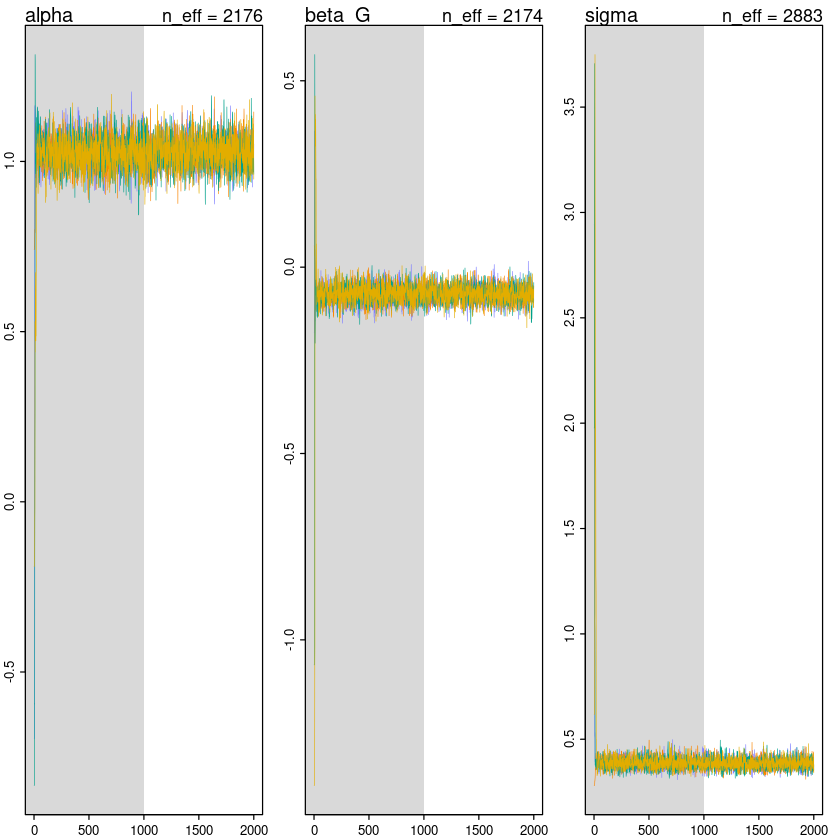

In [23]:
traceplot_ulam(m.1) # 

In [24]:
precis(m.1, prob=.89) # look at the model estimations

mean        sd         5.5%       94.5%       n_eff    Rhat4    
alpha   1.02666943 0.04546075  0.9555359  1.10080305 2176.429 0.9999431
beta_G -0.07178009 0.02302252 -0.1082855 -0.03525341 2174.412 1.0006246
sigma   0.38450440 0.02622310  0.3448129  0.42906515 2882.853 1.0006127

## Improve the model

The fish data is not independent in the experiment because several fish are in a tank, and tanks are within blocks. This means the experiment has a nested design, and therefore, the fish data is not independent. The solution to this problem is to use multilevel models, also known as random-effects, mixed-effects models. 

In [25]:
m.2 <- ulam(

    alist(
    CI ~ dnorm(mu, sigma),            # likelihood
    mu <- alpha + beta_G * Gyro + v_t[Tank] + v_b[Block] ,      # linear model
    alpha ~ dnorm(0,10),              # prior intercept
    beta_G ~ dnorm(0,10),             # prior slope 
    sigma ~ exponential(1),            # prior error
  
# Group level effects
    v_t[Tank] ~ dnorm(0,sigma_t), 
    v_b[Block] ~ dnorm(0,sigma_b),
    sigma_t ~ exponential(1),
    sigma_b ~ exponential(1)    
        
    ), data = m.data, log_lik = TRUE,
    chains = 4, 
    cores = 4,
    iter = 4000,
    warmup = 2000,
    control = list(adapt_delta = 0.92, max_treedepth = 11) # options to tune up the model
)

Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”


[1] 4000
[1] 1
[1] 4000


Waiting to draw page 2 of 4

Waiting to draw page 3 of 4



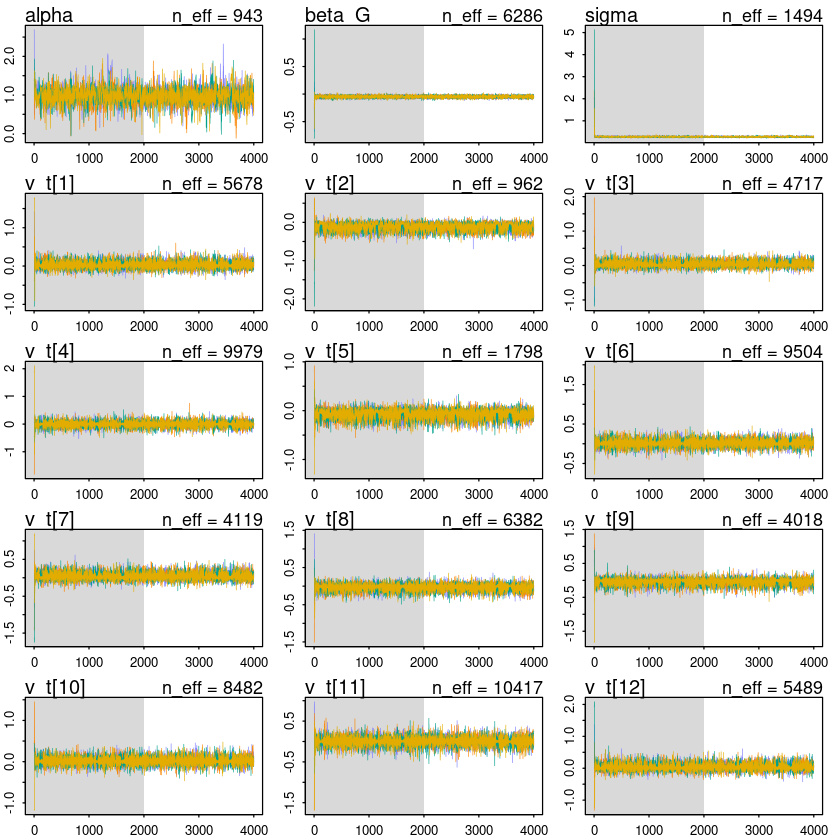

Waiting to draw page 4 of 4



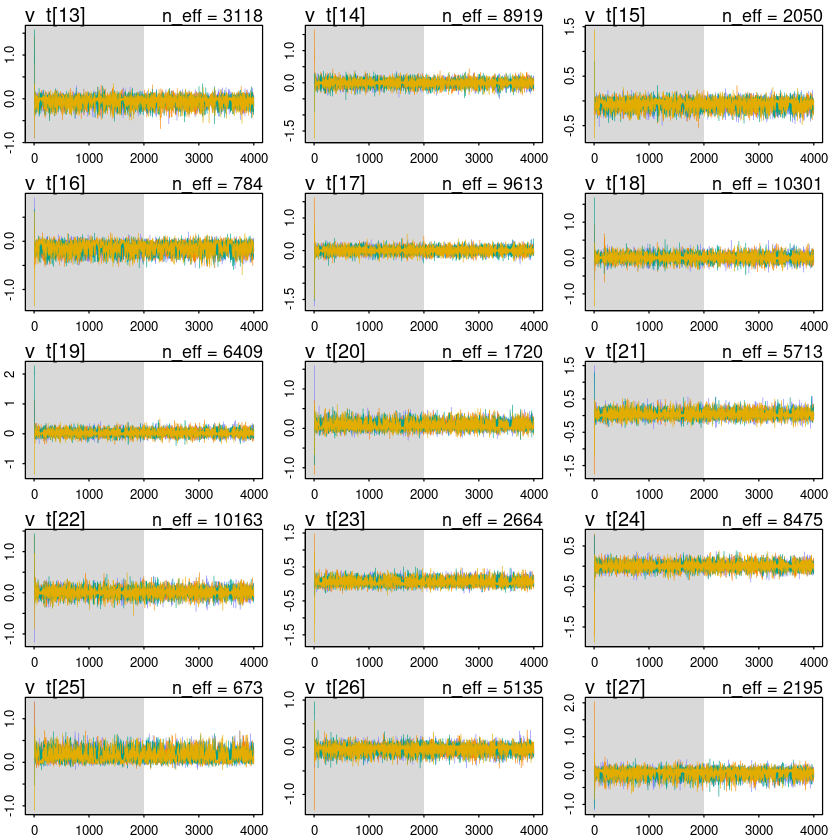

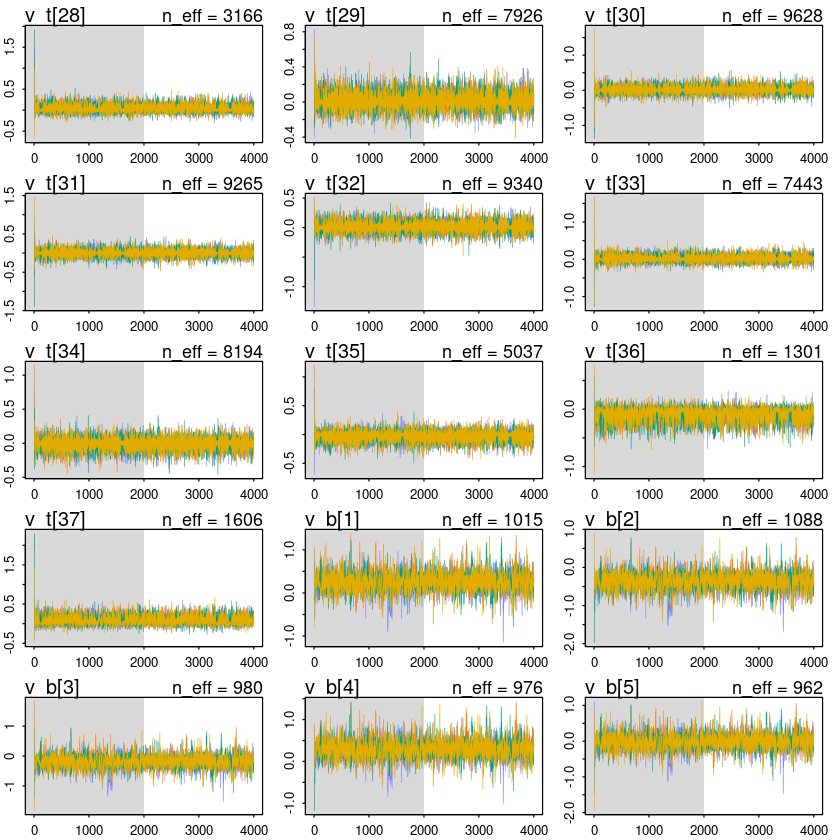

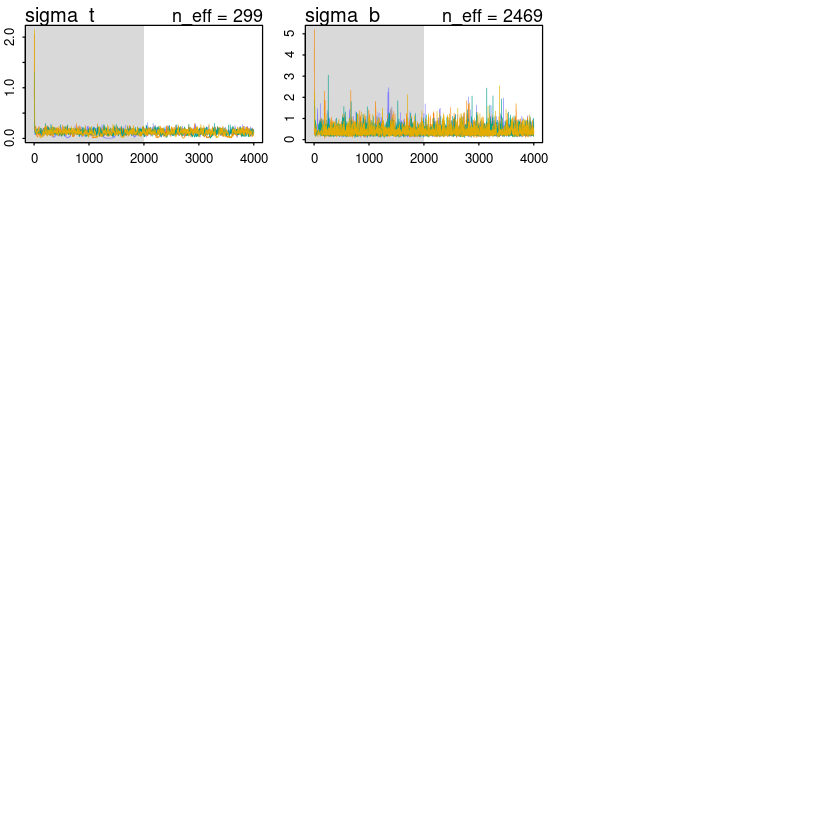

In [26]:
traceplot_ulam(m.2)

In [27]:
m.3 <- ulam(

    alist(
    CI ~ dnorm(mu, sigma),            # likelihood
    mu <- alpha + beta_G * Gyro + beta_L*Lake +
        v_t[Tank]  + v_b[Block],      # linear model
    alpha ~ dnorm(0,10),              # prior intercept
    beta_G ~ dnorm(0,10),             # prior slope 
    beta_L ~ dnorm(0,10),             # prior slope 
    sigma ~ exponential(1),            # prior error
  
# Group level effects
    v_t[Tank] ~ dnorm(0,sigma_t), 
    v_b[Block] ~ dnorm(0,sigma_b),
    sigma_t ~ exponential(1),
    sigma_b ~ exponential(1)    
        
    ), data = m.data, log_lik = TRUE,
    chains = 4, 
    cores = 4,
    iter = 2000,
    warmup = 1000
)


m.4 <- ulam(

    alist(
    CI ~ dnorm(mu, sigma),            # likelihood
    mu <- alpha + beta_G * Gyro + beta_L*Lake + beta_GL*(Lake*Gyro) +
        v_t[Tank] + v_b[Block],      # linear model
    alpha ~ dnorm(0,10),              # prior intercept
    beta_G ~ dnorm(0,10),             # prior slope 
    beta_L ~ dnorm(0,10),             # prior slope 
    beta_GL ~ dnorm(0,10),             # prior slope 
    sigma ~ exponential(1),            # prior error
  
# Group level effects
    v_t[Tank] ~ dnorm(0,sigma_t), 
    v_b[Block] ~ dnorm(0,sigma_b),
    sigma_t ~ exponential(1),
    sigma_b ~ exponential(1)    
        
    ), data = m.data, log_lik = TRUE,
    chains = 4, 
    cores = 4,
    iter = 2000,
    warmup = 1000
)

Warning message:
“There were 1 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#tail-ess”
Warning message:
“There were 2 chains where the estimated Bayesian Fraction of Missing Information was low. See
http://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicatin

[1] 2000
[1] 1
[1] 2000


Waiting to draw page 2 of 4

Waiting to draw page 3 of 4



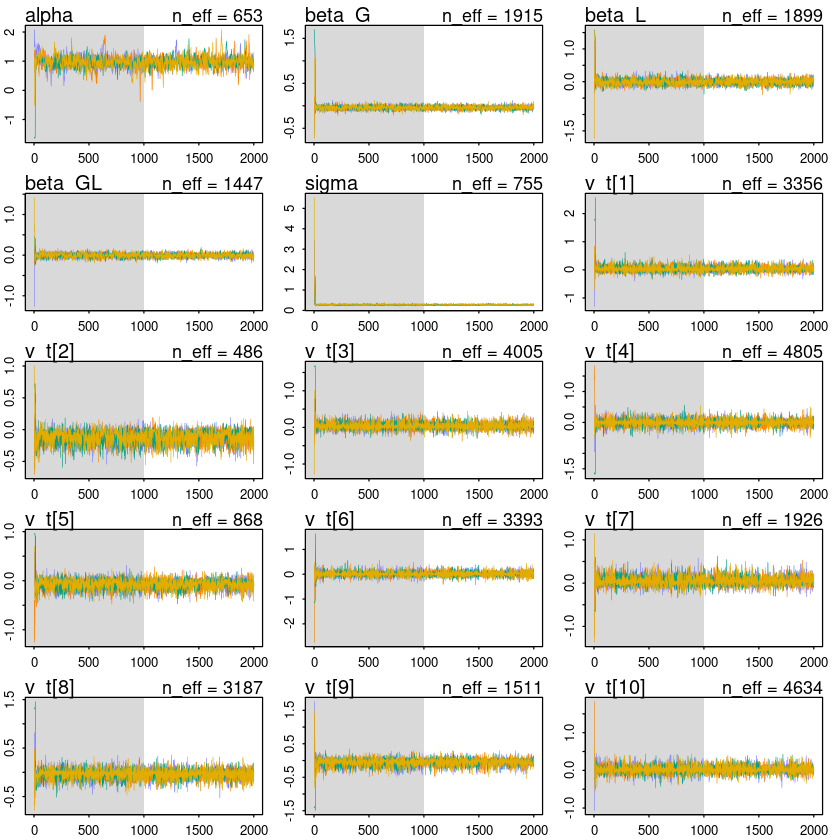

Waiting to draw page 4 of 4



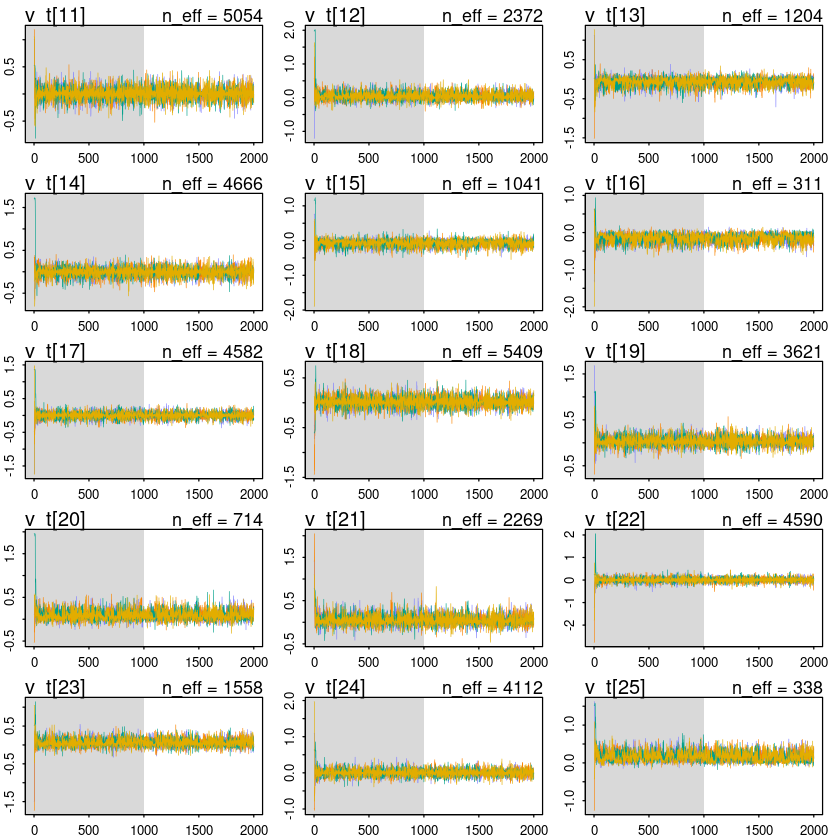

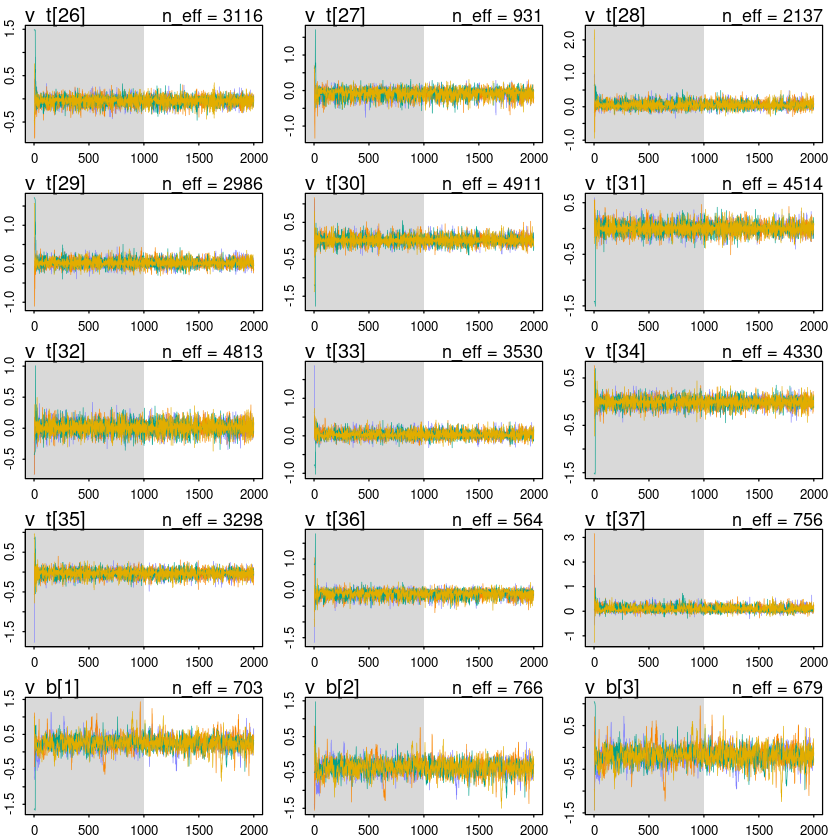

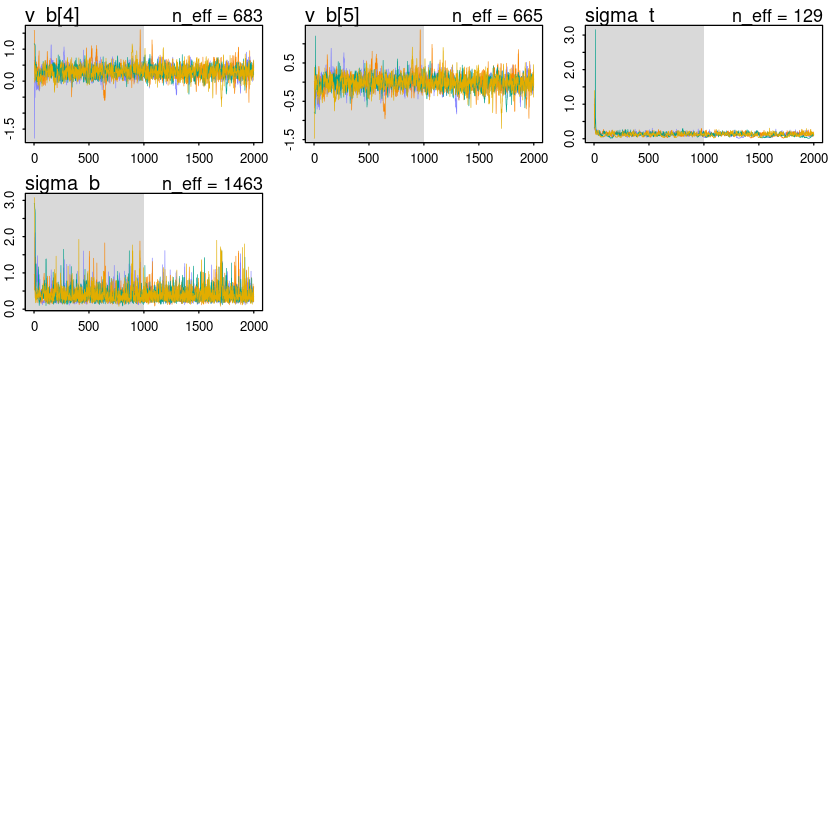

In [22]:
traceplot_ulam(m.4)

## Choose between models

Something significant during statistical analysis is the selection of the best and simplest model that describes the phenomena. There is large literature to do that, but we can start using the `compare()` function.  Basically, the best model is the one with the lowest `WAIC` and the highest `weight`.

In [28]:
compare(m.1, m.2, m.3, m.4)

WAIC      SE       dWAIC     dSE        pWAIC     weight      
m.2  46.01639 21.07104  0.000000         NA 16.677844 5.493169e-01
m.3  47.06276 21.00351  1.046371  0.5998244 17.541973 3.255416e-01
m.4  48.97485 20.91501  2.958461  0.5160404 17.733542 1.251415e-01
m.1 107.64785 17.16532 61.631462 13.1450284  2.684836 2.273637e-14

## Plotting predictions and testing hypothesis

The basis of plotting prediction and testing hypothesis is to extract the posterior distributions, reconstruct the predictions for each treatment, comparing those predictions, and estimating the probability of them to be different.

In [29]:
post4 = extract.samples(m.4)
str(post4)

List of 9
 $ alpha  : num [1:4000(1d)] 0.847 1.225 0.707 1.006 0.986 ...
 $ beta_G : num [1:4000(1d)] -0.0611 -0.0999 -0.0155 -0.0808 -0.0513 ...
 $ beta_L : num [1:4000(1d)] -0.0856 -0.066 -0.1859 -0.0309 -0.0166 ...
 $ beta_GL: num [1:4000(1d)] 0.04 0.0692 -0.0302 0.0344 0.0293 ...
 $ sigma  : num [1:4000(1d)] 0.296 0.284 0.273 0.311 0.274 ...
 $ v_t    : num [1:4000, 1:37] -0.0458 -0.0096 0.0133 -0.0449 0.1903 ...
 $ v_b    : num [1:4000, 1:5] 0.3378 0.0606 0.5017 0.2717 0.2134 ...
 $ sigma_t: num [1:4000(1d)] 0.088 0.0236 0.1762 0.0636 0.1141 ...
 $ sigma_b: num [1:4000(1d)] 0.304 0.579 0.196 0.261 0.196 ...
 - attr(*, "source")= chr "ulam posterior: 4000 samples from object"


In [30]:
p.link = function(posteriors, Gyros = NULL, Lake = 1){
   Gyros<- log(Gyros+1)
   pred<- with(posteriors, alpha + beta_G*Gyros + beta_L*Lake + beta_GL*(Gyros*Lake))
   return(pred)
}

In [31]:
# Estimate the body condition of a lake fish with 10 parasites
mean(p.link(posteriors  = post4, Gyros = 10, Lake = 1))
HPDI(p.link(posteriors  = post4, Gyros = 10, Lake = 1), prob=.89)

[1] 0.832801

|0.89     0.89| 
0.5276144 1.1294492

In [32]:
Lgyro_count = seq(from = 0, to = max(m.data$Gyro[which(m.data$Lake == 1)]), length.out = 100)
raw.L = sapply(1:length(Lgyro_count), function(i)p.link(posteriors  = post4, Gyros = Lgyro_count[i], Lake = 1))
Sgyro_count = seq(from = 0, to = max(m.data$Gyro[which(m.data$Lake == 0)]), length.out = 100)
raw.S = sapply(1:length(Sgyro_count), function(i)p.link(posteriors  = post4, Gyros = Sgyro_count[i], Lake = 0))

str(raw.L)

 num [1:4000, 1:100] 0.762 1.159 0.522 0.976 0.969 ...


In [33]:
mean.L = apply(raw.L, 2, mean)
mean.L

[1] 0.9460519 0.9430187 0.9401686 0.9374807 0.9349376 0.9325245 0.9302287
  [8] 0.9280394 0.9259470 0.9239434 0.9220214 0.9201746 0.9183972 0.9166844
 [15] 0.9150314 0.9134344 0.9118896 0.9103938 0.9089438 0.9075371 0.9061711
 [22] 0.9048434 0.9035521 0.9022951 0.9010707 0.8998773 0.8987133 0.8975772
 [29] 0.8964679 0.8953840 0.8943244 0.8932881 0.8922741 0.8912813 0.8903090
 [36] 0.8893563 0.8884225 0.8875067 0.8866084 0.8857268 0.8848614 0.8840116
 [43] 0.8831768 0.8823564 0.8815501 0.8807574 0.8799777 0.8792107 0.8784559
 [50] 0.8777130 0.8769816 0.8762614 0.8755520 0.8748530 0.8741643 0.8734855
 [57] 0.8728163 0.8721564 0.8715057 0.8708637 0.8702304 0.8696055 0.8689887
 [64] 0.8683799 0.8677788 0.8671853 0.8665992 0.8660202 0.8654482 0.8648831
 [71] 0.8643247 0.8637728 0.8632273 0.8626880 0.8621547 0.8616275 0.8611060
 [78] 0.8605903 0.8600801 0.8595754 0.8590760 0.8585819 0.8580928 0.8576088
 [85] 0.8571297 0.8566554 0.8561858 0.8557208 0.8552604 0.8548044 0.8543528
 [92] 0.8539054 0.8534623 0.8530232 0.8525882 0.8521572 0.8517301 0.8513068
 [99] 0.8508873 0.8504714

In [34]:
ci.L = apply(raw.L, 2, HPDI, prob=.95)
ci.L

[,1]      [,2]      [,3]      [,4]     [,5]      [,6]      [,7]     
|0.95 0.5621607 0.5592499 0.5554943 0.551282 0.5500764 0.5377027 0.5374675
0.95| 1.3461105 1.3415403 1.3361852 1.330847 1.3288403 1.3175933 1.3159766
      [,8]      [,9]      [,10]     [,11] [,12]    [,13]     [,14]    
|0.95 0.5365865 0.5307769 0.5274979 ⋯     0.463641 0.4632514 0.4628655
0.95| 1.3151955 1.3103072 1.3068198 ⋯     1.241934 1.2413700 1.2409088
      [,15]     [,16]     [,17]    [,18]    [,19]     [,20]     [,21]    
|0.95 0.4624832 0.4620723 0.461729 0.461357 0.4608334 0.4600815 0.4591706
0.95| 1.2406742 1.2404419 1.240294 1.239983 1.2397573 1.2395332 1.2391407

In [35]:
mean.S = apply(raw.S, 2, mean)
ci.S = apply(raw.S, 2, HPDI)

## testing hypothesis with the posteriors

- does parasite load reduces body condition? what is the probability of $\beta_{G} < 0$?
- is this relationship different between ecotypes?

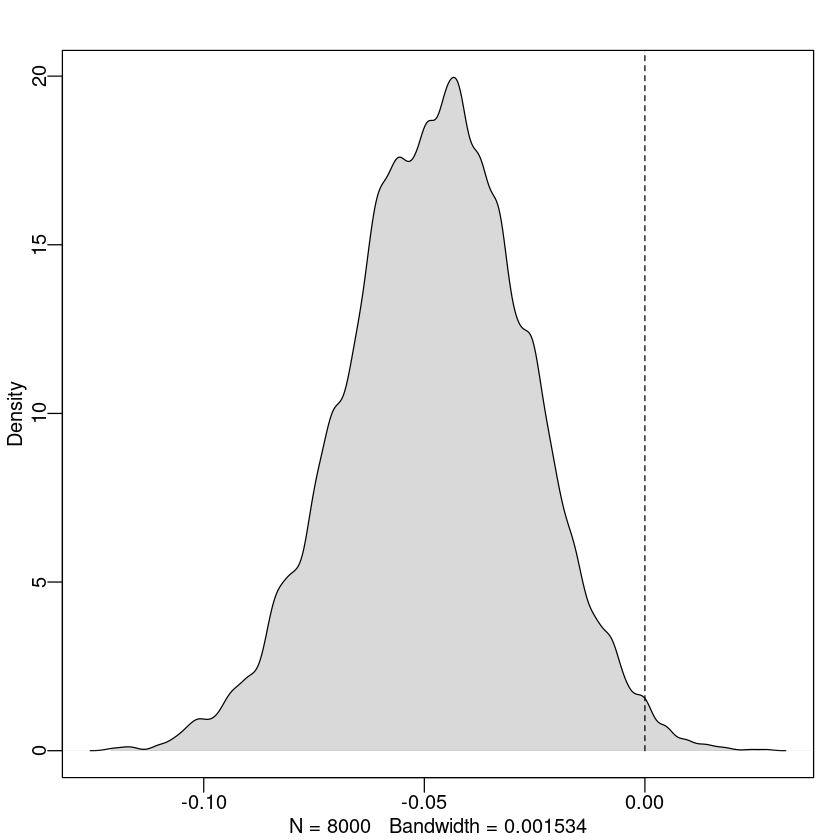

In [36]:
# does parasite load reduces body condition?
post2 = extract.samples(m.2)
dens(post2$beta_G, show.HPDI = TRUE, show.zero = TRUE)

## Bayesian statistics is just counting

In [37]:
# what is the probability of $\beta_{G} < 0$?
n_negative = length(which(post2$beta_G <0 ))
n_total = length(post2$beta_G )
round((n_negative/n_total) * 100,3) 

[1] 99.062

In [38]:
# is this relationship different between ecotypes?
# what is the probability of $\beta_{GL} > 0$?
n_negative = length(which(post4$beta_GL >0 ))
n_total = length(post4$beta_GL )
round((n_negative/n_total) * 100,3) 

[1] 46.7

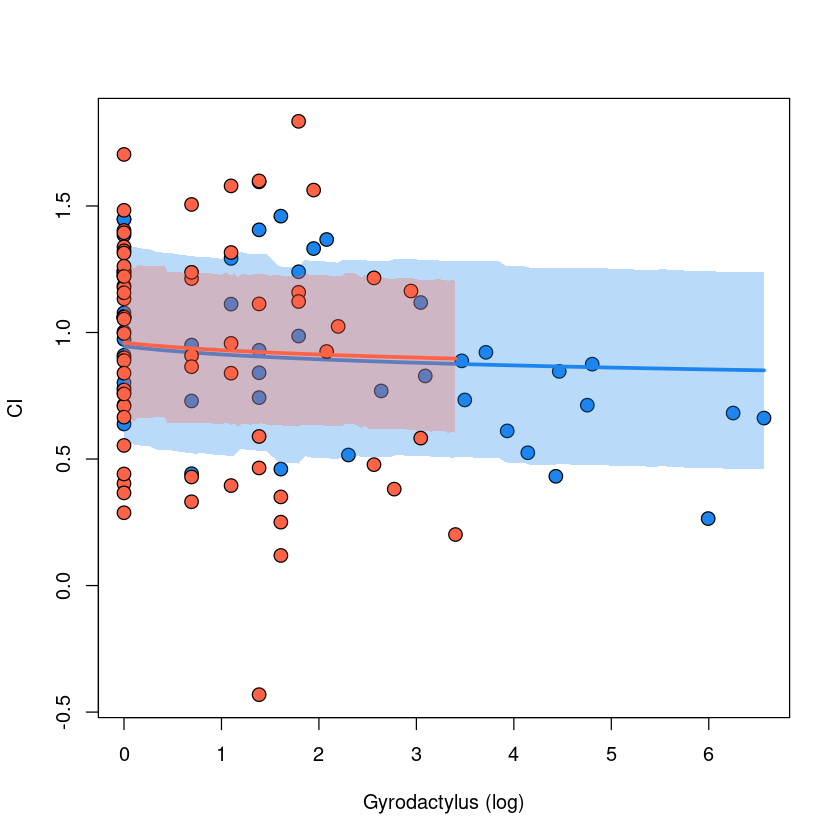

In [39]:

plot(CI ~ Gyro, m.data, pch="", xlab = "Gyrodactylus (log)")
points(CI ~ Gyro, subset(m.data, Lake == 1), pch=21, bg = "dodgerblue2" ,cex = 1.5)
lines(x =Lgyro_count, y = mean.L, col = "dodgerblue2", lty=1, lwd=3 )
shade(ci.L, Lgyro_count, col = col.alpha('dodgerblue2', 0.3) )

points(CI ~ Gyro, subset(m.data, Lake == 0), pch=21, bg = "tomato" ,cex = 1.5)
lines(x =Sgyro_count, y = mean.S, col = "tomato", lty=1, lwd=3 )
shade(ci.S, Sgyro_count, col = col.alpha('tomato', 0.3) )

In [40]:
precis(m.4, prob=.89)

42 vector or matrix parameters hidden. Use depth=2 to show them.



mean        sd         5.5%        94.5%      n_eff     Rhat4   
alpha    0.96002905 0.19617797  0.65131857 1.26203832  824.2509 1.005271
beta_G  -0.04263861 0.04236686 -0.11078012 0.02418407 1651.4012 1.005166
beta_L  -0.01397718 0.09048112 -0.15927769 0.12978258 1852.4260 1.002080
beta_GL -0.00459069 0.05257661 -0.08995964 0.07981822 1145.4791 1.006101
sigma    0.27615141 0.02220589  0.24233368 0.31262586  784.0897 1.006556
sigma_t  0.11768666 0.05050487  0.03291896 0.19920548  109.0833 1.040686
sigma_b  0.39608416 0.20235913  0.19003912 0.76008070 1821.2546 1.001039

In [41]:
glimmer(CI ~ Gyro + (1|Tank|Block), data = m.data)

Warning message in Ops.factor(1, Tank):
“‘|’ not meaningful for factors”


alist(
    CI ~ dnorm( mu , sigma ),
    mu <- Intercept +
        b_Gyro*Gyro +
        v_Intercept[Block] +
        v_1 | TankTRUE[Block]*1 | TankTRUE,
    Intercept ~ dnorm(0,10),
    b_Gyro ~ dnorm(0,10),
    c(v_Intercept,v_1 | TankTRUE)[Block] ~ dmvnorm2(0,sigma_Block,Rho_Block),
    sigma_Block ~ dcauchy(0,2),
    Rho_Block ~ dlkjcorr(2),
    sigma ~ dcauchy(0,2)
)


# Running bayesian models in the `brms` package

## testing the effects of the treatments on the number of parasites 
We are going to start by running a model in the `brms` package and testing the effects of our Origin by Parasite Exposure by Nutrient manipulations:

In [42]:
Gyro_1 = brm(Gyrocount ~ Origin*Nutrients*Exposure + offset(Sd.lenght.mm) +
              (1|Tank/Block),
              family = zero_inflated_negbinomial,
             data = data, 
              cores = 4, chains = 4, iter= 4000, warmup=2000,
             control = list(adapt_delta = 0.95, max_treedepth = 14)
             )

Compiling Stan program...

Start sampling

Warning message:
“There were 1 divergent transitions after warmup. See
http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


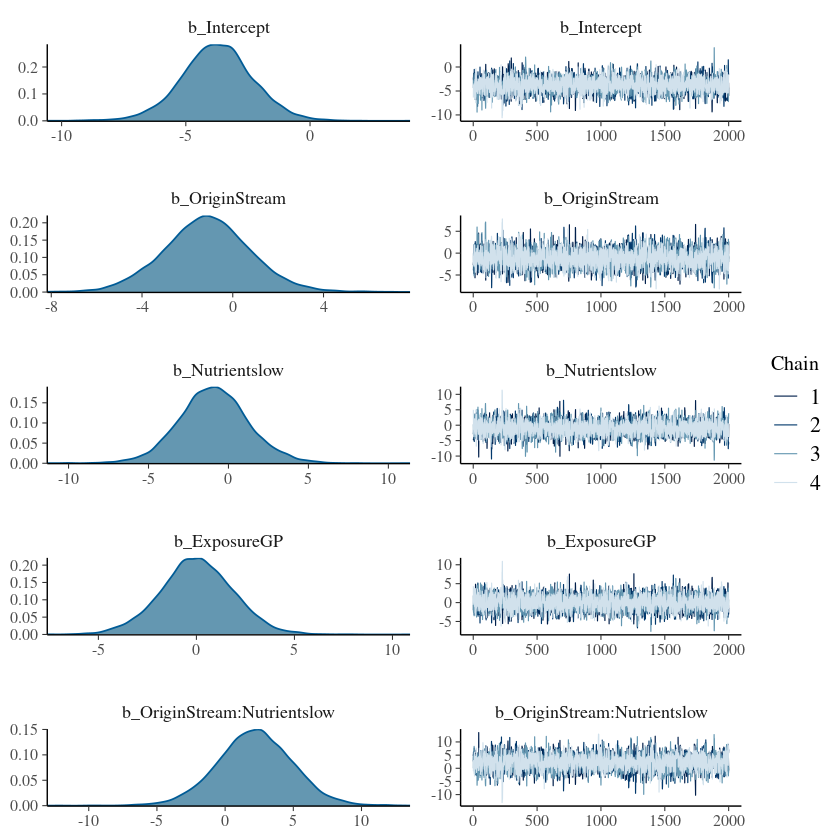

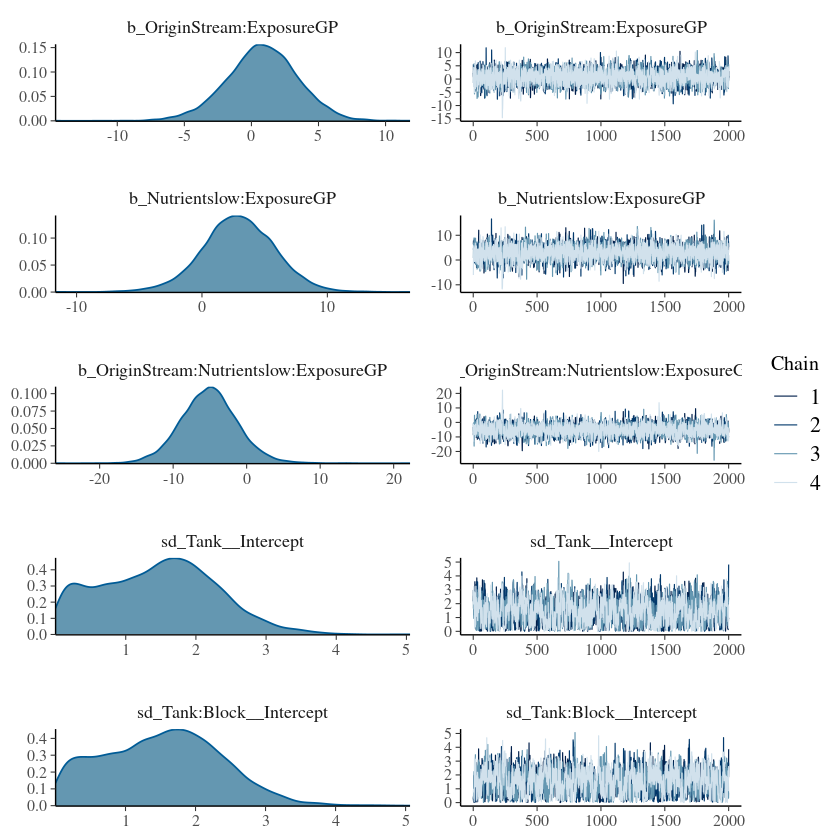

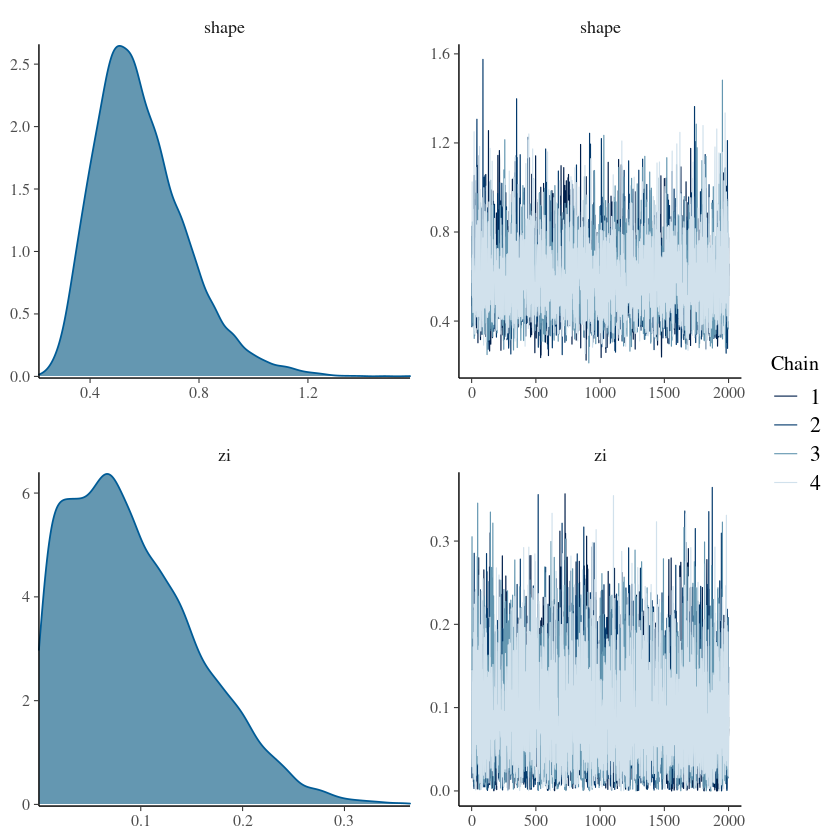

In [43]:
plot(Gyro_1)

In [44]:
summary(Gyro_1)

Warning message:
“There were 1 divergent transitions after warmup. Increasing adapt_delta above 0.95 may help. See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”


 Family: zero_inflated_negbinomial 
  Links: mu = log; shape = identity; zi = identity 
Formula: Gyrocount ~ Origin * Nutrients * Exposure + offset(Sd.lenght.mm) + (1 | Tank/Block) 
   Data: data (Number of observations: 114) 
Samples: 4 chains, each with iter = 4000; warmup = 2000; thin = 1;
         total post-warmup samples = 8000

Group-Level Effects: 
~Tank (Number of levels: 37) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.46      0.82     0.08     3.08 1.00     1260     3223

~Tank:Block (Number of levels: 37) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.52      0.83     0.09     3.15 1.00     1036     2454

Population-Level Effects: 
                                     Estimate Est.Error l-95% CI u-95% CI Rhat
Intercept                               -3.74      1.45    -6.64    -0.90 1.00
OriginStream                            -1.12      1.92    -4.87     2.72 1.00
Nutrientslow 

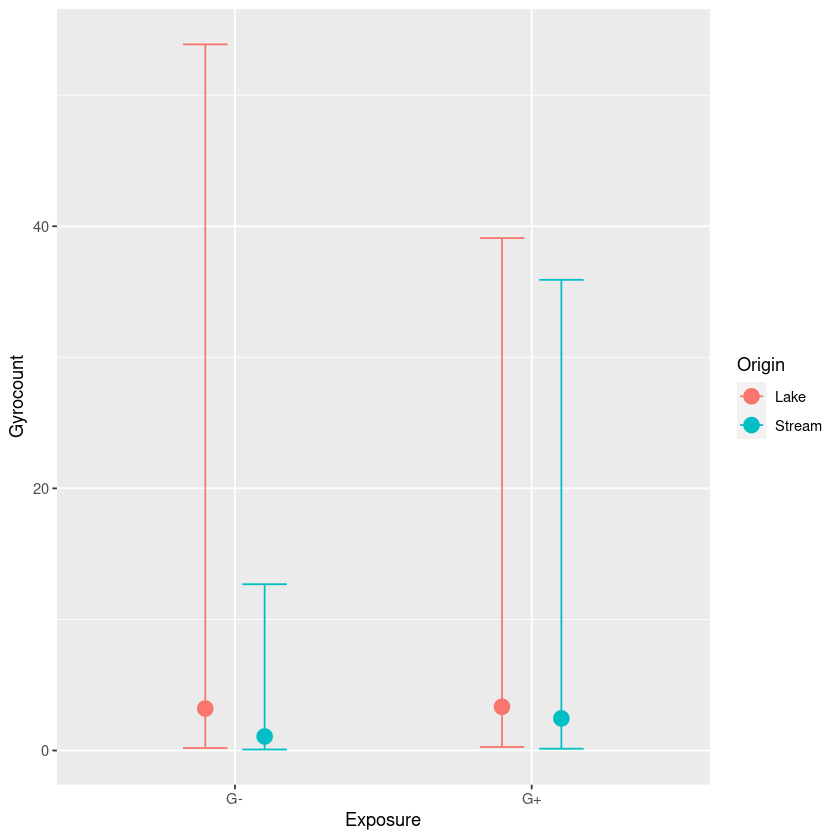

In [45]:
conditional_effects(Gyro_1, effects = "Exposure:Origin")

In [46]:
Gyro_2 = brm(Gyrocount ~ Origin*Exposure + offset(Sd.lenght.mm) +
              (1|Tank/Block),
              family = zero_inflated_negbinomial,
             data = data, 
              cores = 4, chains = 4, iter= 4000, warmup=2000,
             control = list(adapt_delta = 0.95, max_treedepth = 14)
             )

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [48]:
Gyro_1 <- add_criterion(Gyro_1, criterion = 'loo')
Gyro_2 <- add_criterion(Gyro_2, criterion = 'loo')
loo_compare(Gyro_1, Gyro_2)

Warning message:
“Found 9 observations with a pareto_k > 0.7 in model 'Gyro_1'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”
Warning message:
“Found 10 observations with a pareto_k > 0.7 in model 'Gyro_2'. It is recommended to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. ”


elpd_diff se_diff  elpd_loo  se_elpd_loo p_loo    se_p_loo looic   
Gyro_2  0.000000 0.000000 -293.8219 23.00118    22.95970 2.794649 587.6439
Gyro_1 -1.196113 1.084787 -295.0180 23.22533    24.88721 3.231807 590.0361
       se_looic
Gyro_2 46.00236
Gyro_1 46.45065

In [49]:
loo_model_weights(Gyro_1, Gyro_2)

Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”
Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”


Method: stacking
------
       weight
Gyro_1 0.000 
Gyro_2 1.000 

In [50]:
post_G2 = posterior_samples(Gyro_2)
str(post_G2)

'data.frame':	8000 obs. of  83 variables:
 $ b_Intercept                 : num  -3.22 -4.48 -4.82 -5.52 -4.95 ...
 $ b_OriginStream              : num  -0.173 0.249 0.692 1.618 1.267 ...
 $ b_ExposureGP                : num  1.957 1.869 2.414 1.81 0.831 ...
 $ b_OriginStream:ExposureGP   : num  -1.883 -1.784 -2.104 -2.735 -0.874 ...
 $ sd_Tank__Intercept          : num  1.36 1.43 1.4 2.12 2.38 ...
 $ sd_Tank:Block__Intercept    : num  0.495 0.583 0.157 0.183 0.282 ...
 $ shape                       : num  0.51 0.466 0.461 0.412 0.399 ...
 $ zi                          : num  0.0136 0.1568 0.0496 0.0637 0.0516 ...
 $ r_Tank[1,Intercept]         : num  -2.8569 -0.0474 -1.1345 -0.2059 0.2091 ...
 $ r_Tank[2,Intercept]         : num  -0.0557 0.8451 0.6257 1.029 -0.1909 ...
 $ r_Tank[3,Intercept]         : num  -0.0422 1.3163 0.7352 0.9877 -0.3758 ...
 $ r_Tank[4,Intercept]         : num  -0.705 -0.503 -0.672 -3.808 -4.309 ...
 $ r_Tank[5,Intercept]         : num  -2.869 0.7712 0.0914 1.344

In [51]:
# What is the probability that Lake G+ have more parasites than Stream G+ fish?
LG = post_G2$b_Intercept + post_G2$b_OriginStream*0 + post_G2$b_ExposureGP*1 + post_G2$`b_OriginStream:ExposureGP`*0
SG = post_G2$b_Intercept + post_G2$b_OriginStream*1 + post_G2$b_ExposureGP*1 + post_G2$`b_OriginStream:ExposureGP`*1

n_negative = length(which(LG - SG > 0 ))
n_total = length(LG)
round((n_negative/n_total) * 100,3) 

[1] 90.762

In [52]:
loo_R2(Gyro_2)

Warning message:
“Some Pareto k diagnostic values are too high. See help('pareto-k-diagnostic') for details.
”


Estimate   Est.Error Q2.5 Q97.5     
R2 -0.9609392 0.1387746 -1   -0.4573512